In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from lib.RedDotsData import RedDotsData
from lib.FolderStructure import FolderStructure
from lib.CrabsData import CrabsData


#rootDir ="C:/workspaces/AnjutkaVideo/Kara_Sea_Crab_Video_st_5993_2018/"
#videoFileName = "V3__R_20180915_205551"
#videoFileName = "V4__R_20180915_210447"
#videoFileName = "V6__R_20180915_212238"


rootDir = "C:/workspaces/AnjutkaVideo/KaraSeaCrabVideoBlagopoluchiyaBay2018/"
#videoFileName = "V3_R_20180911_170159"
#videoFileName = "V2_R_20180911_165730"
videoFileName = "V1_R_20180911_165259"

folderStruct = FolderStructure(rootDir, videoFileName)

rdd = RedDotsData(folderStruct) #.getRedDotsFilepath())
rdd.getCount()

crabsData = CrabsData(folderStruct)
crabsDF = crabsData.getPandasDF()
crabsData.getCount()

17

In [2]:
crabsDF.head(5)

,dir,filename,frameNumber,createdOn,crabNumber,crabWidthPixels,crabLocationX,crabLocationY,crabCoordinatePoint,cranbCoordinateBox
1,C:/workspaces/AnjutkaVideo/KaraSeaCrabVideoBla...,frame000645.jpg,657.0,2019-08-12_21:35:07,0,48.414873747600005,1027,553,"(1027,553)","[(1008,538):(1046,568)]"
2,C:/workspaces/AnjutkaVideo/KaraSeaCrabVideoBla...,frame000645.jpg,645.0,2019-08-12_21:35:07,1,30.413812651500002,286,875,"(286,875)","[(275,865):(297,886)]"
3,C:/workspaces/AnjutkaVideo/KaraSeaCrabVideoBla...,frame005715.jpg,5715.0,2019-08-12_21:54:54,0,29.9666481275,1028,903,"(1028,903)","[(1015,897):(1042,910)]"
4,C:/workspaces/AnjutkaVideo/KaraSeaCrabVideoBla...,frame005715.jpg,5723.0,2019-08-12_21:54:54,1,32.0156211872,386,979,"(386,979)","[(370,979):(402,980)]"
5,C:/workspaces/AnjutkaVideo/KaraSeaCrabVideoBla...,frame000254.jpg,254.0,2019-08-12_21:56:20,0,27.459060435500003,795,380,"(795,380)","[(782,378):(809,383)]"


In [3]:
redDots = rdd.interpolated()
#redDots.head(5)
#redDots.dtypes

In [4]:
column_names = ['dir','filename','frameID','createdOn','crabNumber',"crabWidthPixels","crabLocationX", 'crabLocationY',
                'crabCoordinatePoint','cranbCoordinateBox']
crabsDF = crabsData.getPandasDF() #pd.read_csv(folderStruct.getCrabsFilepath(),delimiter="\t",na_values="(null)",names = column_names) # 24 errors

#crabsDF["frameNumberrr"]=pd.to_numeric(crabsDF["frameNumber"],errors='coerce') 
#crabsDF.astype({'frameNumberrr': 'int64'}).dtypes
#crabsDF["frameNumber"] = crabsDF["frameNumber"].str.replace('\\.0', '').astype('int64')

crabsDF["frameNumber"]=pd.to_numeric(crabsDF["frameNumber"],errors='coerce') 
crabsDF["frameNumber"] = crabsDF["frameNumber"].astype('int64')
crabsDF["crabLocationX"] = crabsDF["crabLocationX"].astype('int64')
crabsDF["crabLocationY"] = crabsDF["crabLocationY"].astype('int64')
crabsDF["crabWidthPixels"]=pd.to_numeric(crabsDF["crabWidthPixels"],errors='coerce') 
#crabsDF.dtypes
#crabsDF.head(30)

In [9]:
#crabsDF[(crabsDF['frameNumber'] < 300) & (crabsDF['frameNumber'] >= 71)].head(50)

#crabsData.crabsBetweenFrames(9000,11100)
crabsData.crabsBetweenFrames(50,300)

#.to_dict() #.head(40)

[{'crabLocationX': 795, 'crabLocationY': 380, 'frameNumber': 254},
 {'crabLocationX': 687, 'crabLocationY': 192, 'frameNumber': 114},
 {'crabLocationX': 1491, 'crabLocationY': 463, 'frameNumber': 250},
 {'crabLocationX': 1156, 'crabLocationY': 250, 'frameNumber': 254},
 {'crabLocationX': 262, 'crabLocationY': 733, 'frameNumber': 71}]

In [6]:
res=pd.merge(crabsDF[['dir','filename','frameNumber',"crabWidthPixels","crabLocationX", 'crabLocationY']], 
             redDots[['frameNumber','mm_per_pixel']],left_on=['frameNumber'], right_on= ['frameNumber'],how='left')
res.head(20)

,dir,filename,frameNumber,crabWidthPixels,crabLocationX,crabLocationY,mm_per_pixel
0,C:/workspaces/AnjutkaVideo/KaraSeaCrabVideoBla...,frame000645.jpg,657,48.414874,1027,553,NaN
1,C:/workspaces/AnjutkaVideo/KaraSeaCrabVideoBla...,frame000645.jpg,645,30.413813,286,875,NaN
2,C:/workspaces/AnjutkaVideo/KaraSeaCrabVideoBla...,frame005715.jpg,5715,29.966648,1028,903,0.632290
3,C:/workspaces/AnjutkaVideo/KaraSeaCrabVideoBla...,frame005715.jpg,5723,32.015621,386,979,0.633045
4,C:/workspaces/AnjutkaVideo/KaraSeaCrabVideoBla...,frame000254.jpg,254,27.459060,795,380,NaN
5,C:/workspaces/AnjutkaVideo/KaraSeaCrabVideoBla...,frame009981.jpg,10026,33.015148,221,368,0.720206
6,C:/workspaces/AnjutkaVideo/KaraSeaCrabVideoBla...,frame010243.jpg,10243,23.409400,865,304,0.629422
7,C:/workspaces/AnjutkaVideo/KaraSeaCrabVideoBla...,blabla-filename.maxim,645,26.248809,288,873,NaN
8,C:/workspaces/AnjutkaVideo/KaraSeaCrabVideoBla...,blabla-filename.maxim,10530,31.144823,101,420,0.536954
9,C:/workspaces/AnjutkaVideo/KaraSeaCrabVideoBla...,blabla-filename.maxim,500,37.336309,456,81,NaN


In [7]:
res["crabWidthMM"]=res["crabWidthPixels"] * res["mm_per_pixel"] 
res.head(20)

,dir,filename,frameNumber,crabWidthPixels,crabLocationX,crabLocationY,mm_per_pixel,crabWidthMM
0,C:/workspaces/AnjutkaVideo/KaraSeaCrabVideoBla...,frame000645.jpg,657,48.414874,1027,553,NaN,NaN
1,C:/workspaces/AnjutkaVideo/KaraSeaCrabVideoBla...,frame000645.jpg,645,30.413813,286,875,NaN,NaN
2,C:/workspaces/AnjutkaVideo/KaraSeaCrabVideoBla...,frame005715.jpg,5715,29.966648,1028,903,0.632290,18.947600
3,C:/workspaces/AnjutkaVideo/KaraSeaCrabVideoBla...,frame005715.jpg,5723,32.015621,386,979,0.633045,20.267316
4,C:/workspaces/AnjutkaVideo/KaraSeaCrabVideoBla...,frame000254.jpg,254,27.459060,795,380,NaN,NaN
5,C:/workspaces/AnjutkaVideo/KaraSeaCrabVideoBla...,frame009981.jpg,10026,33.015148,221,368,0.720206,23.777715
6,C:/workspaces/AnjutkaVideo/KaraSeaCrabVideoBla...,frame010243.jpg,10243,23.409400,865,304,0.629422,14.734403
7,C:/workspaces/AnjutkaVideo/KaraSeaCrabVideoBla...,blabla-filename.maxim,645,26.248809,288,873,NaN,NaN
8,C:/workspaces/AnjutkaVideo/KaraSeaCrabVideoBla...,blabla-filename.maxim,10530,31.144823,101,420,0.536954,16.723339
9,C:/workspaces/AnjutkaVideo/KaraSeaCrabVideoBla...,blabla-filename.maxim,500,37.336309,456,81,NaN,NaN


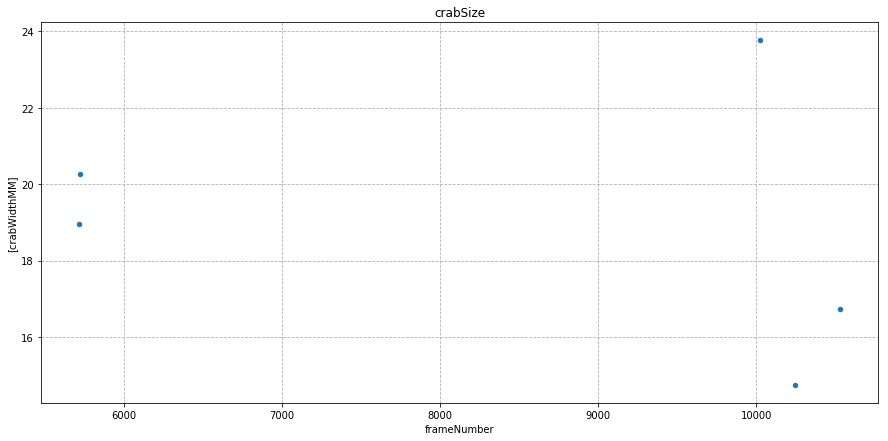

In [8]:
res.plot.scatter(x='frameNumber', y=['crabWidthMM'],figsize=(15,7), title="crabSize")
plt.gca().grid(which='major', axis='both', linestyle='--') #specify grid lines